<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Evaluating Classification Models
Estimated time needed: **25** minutes
    

## Objectives


After completing this lab, you will be able to:

* Implement and evaluate the performance of classification models on real-world data
* Interpret and compare various evaluation metrics and the confusion matrix for each model



## Introduction
In this lab, you will:
- Use the breast cancer data set included in scikit-learn to predict whether a tumor is benign or malignant
- Create two classification models and evaluate them. 
- Add some Gaussian random noise to the features to simulate measurement errors
 
Interpreting and comparing the various evaluation metrics and the confusion matrix for each model will provide you with some valuable intuition regarding what the evaluation metrics mean and how they might impact your interpretation of the model performances.

Your goal in this lab is **not** to find the best classifier - it is primarily intended for you to practice interpreting and comparing results in the context of a real-world problem.


First, to make sure that the required libraries are available, execute the cell below.


In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 147.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 150.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 164.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 162.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 131.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 136.2 MB/s eta 0:00:00


## Import the required libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Load the Breast Cancer data set


In [3]:
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

### Print the description of the Breast Cancer data set


In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In summary, each observation in the data set consists of a variety attributes measured from a sample of cells from a suspicious mass taken from a patient. 
The goal is to predict whether a mass is malignant (positive case) or benign (negative case):


In [5]:
print(data.target_names)

['malignant' 'benign']


### Standardize the data


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Add some noise
Next, add some noise to simulate random measurement error, then view the first few rows of the original and noisy features for comparison.


In [7]:
# Add Gaussian noise to the data set
np.random.seed(42)  # For reproducibility
noise_factor = 0.5 # Adjust this to control the amount of noise
X_noisy = X_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# Load the original and noisy data sets into a DataFrame for comparison and visualization
df = pd.DataFrame(X_scaled, columns=feature_names)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)

In [8]:
# Display the first few rows of the standardized original and noisy data sets for comparison
print("Original Data (First 5 rows):")
df.head()

Original Data (First 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [9]:
print("\nNoisy Data (First 5 rows):")
df_noisy.head()


Noisy Data (First 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


### Visualizing the noise content. 
You can get a good idea of how much noise there is in the features by comparing values in the previous tables. You can also visualize the differences in several ways.
Let's begin by plotting the histograms of one of the features with and without noise for comparison.
#### Histograms


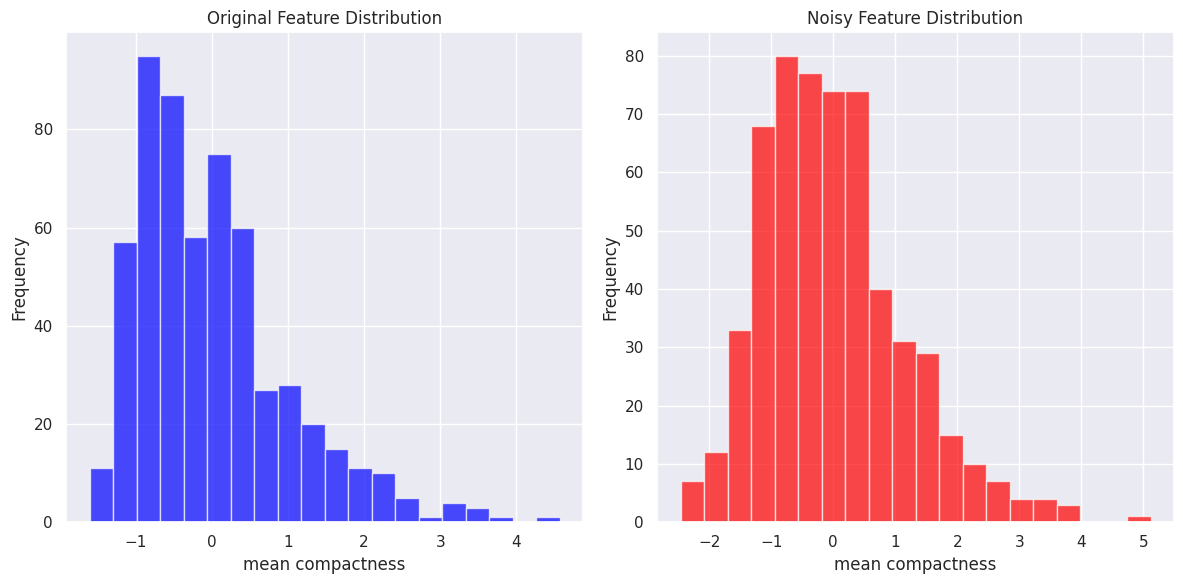

In [10]:
plt.figure(figsize=(12, 6))

# Original Feature Distribution (Noise-Free)
plt.subplot(1, 2, 1)
plt.hist(df[feature_names[5]], bins=20, alpha=0.7, color='blue', label='Original')
plt.title('Original Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

# Noisy Feature Distribution
plt.subplot(1, 2, 2)
plt.hist(df_noisy[feature_names[5]], bins=20, alpha=0.7, color='red', label='Noisy') 
plt.title('Noisy Feature Distribution')
plt.xlabel(feature_names[5])  
plt.ylabel('Frequency')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

The noise-free histogram is skewed to the left and appears to a log-normal distribution, while the noisy histogram is less skewed, tending toward a normal distribution.


#### Plots
You can also plot the two features together to get a sense of their differences.


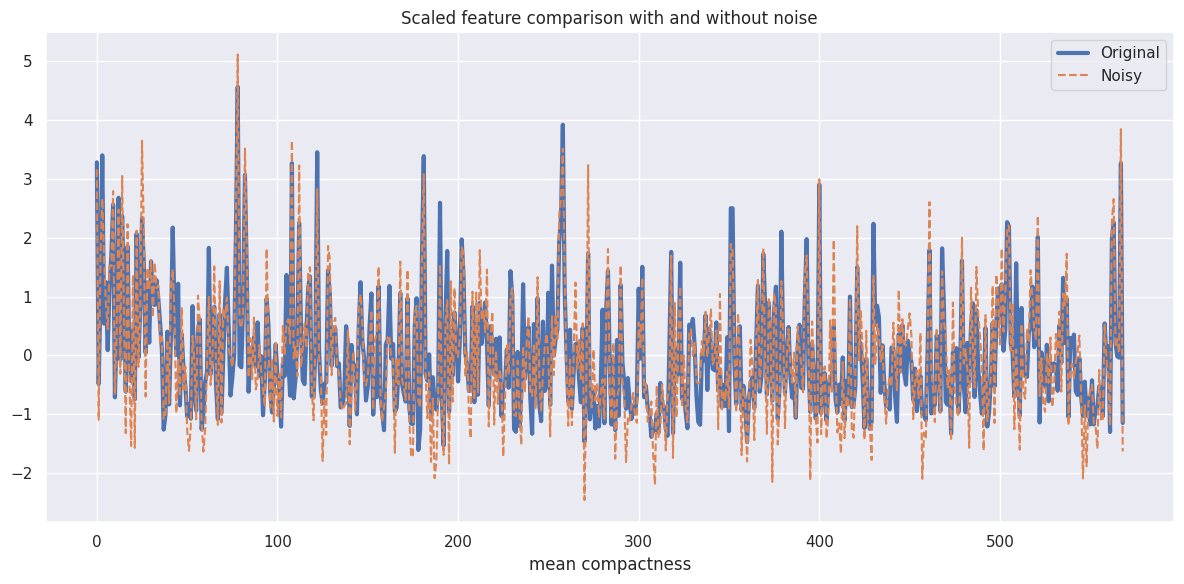

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df[feature_names[5]], label='Original',lw=3)
plt.plot(df_noisy[feature_names[5]], '--',label='Noisy',)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel(feature_names[5])
plt.legend()
plt.tight_layout()
plt.show()

#### Scatterplot
Finally, you can compare the two features ussing a scatterplot. This gives you an excellent idea of how well the two features are correlated.


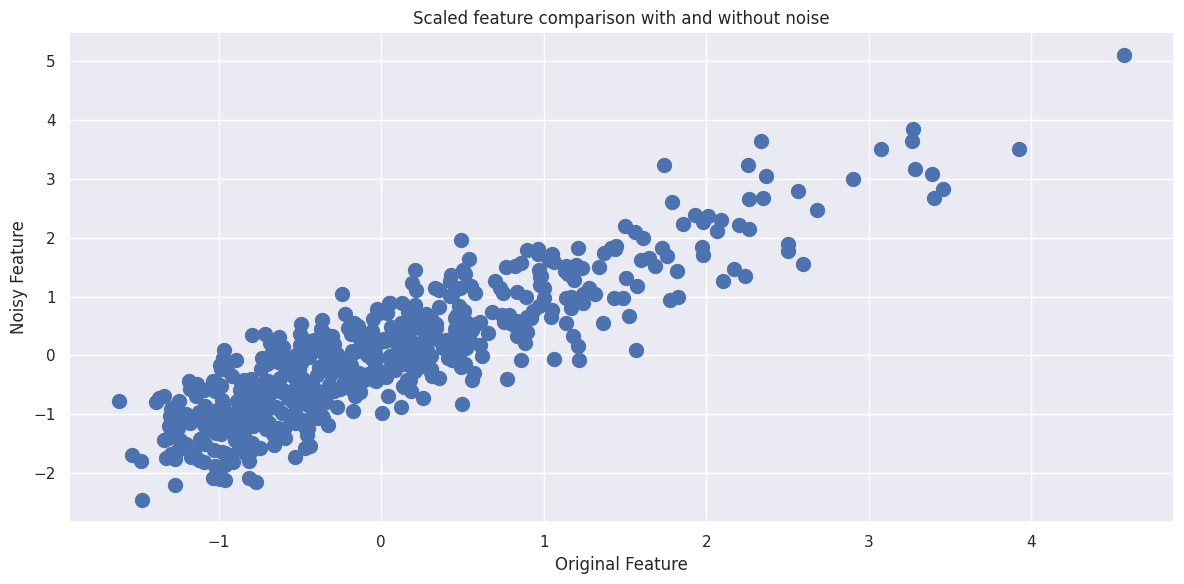

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(df[feature_names[5]], df_noisy[feature_names[5]],lw=5)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel('Original Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.show()

### Exercise 1. Split the data, and fit the KNN and SVM models to the noisy training data


In [13]:
# Enter your code here

# Split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=42)

# Fit the models to the training data
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

<details><summary>Click here for the solution</summary>

```python
# Split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=42)

# Fit the models to the training data
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
```

</details>


### Evaluate the models


#### Predict on the test set


In [14]:
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

#### Print the accuracy scores and classification reports for both models


In [15]:
print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

print("\nKNN Testing Data Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred_svm))

KNN Testing Accuracy: 0.936
SVM Testing Accuracy: 0.971

KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



#### Plot the confusion matrices


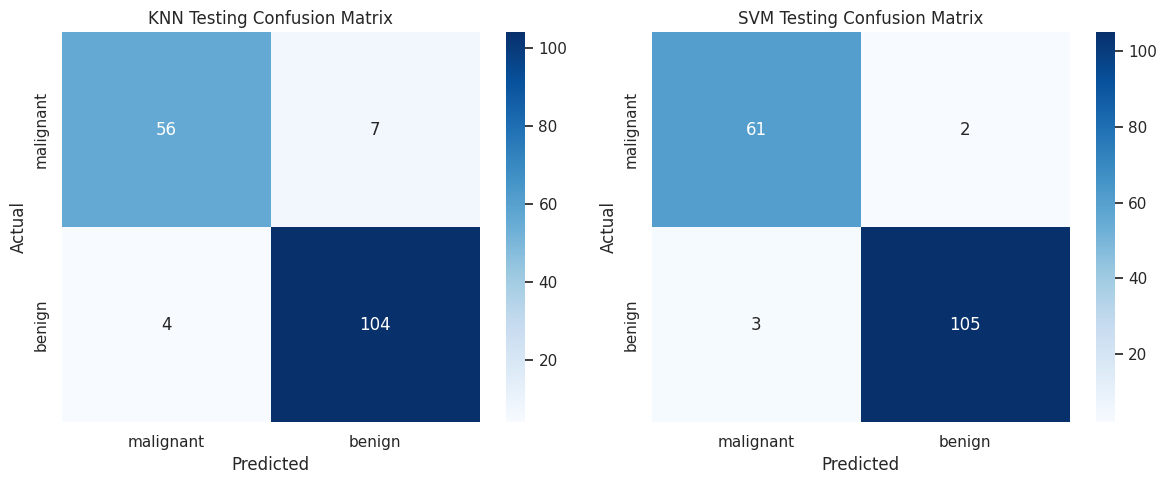

In [16]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Exercise 2. What is the worst kind of prediction error in this context?
It would indeed be very unpleasant to be told you have cancer, when in fact you don't.
But the consequences of being told you don't have cancer when you actually do are life threatening.
State this worse-case scenario in terms of true/false positive/negative diagnoses, and identify their counts from the confusion matrices.


#### Please enter your descriptive answer here and change the cell type to "Markdown" for formatting.


<details><summary>Click here for the solution</summary>
By convention, a positive test for malignancy means a diagnosis of a mass being malignant.
Thus, a benign prediction is a negative prediction.
The worse-case scenario then is a false negative prediction, where the test incorrectly predicts that the mass is benign. 

For the KNN model, the number of false negatives is 7, while for the SVM model the count is 2.
We can say that the SVM model has a higher prediction sensitivity than the KNN model does.
    
</details>


### Exercise 3. What can you say to compare the overall performances of the two models?


#### Please enter your descriptive answer here and change the cell type to "Markdown" for formatting.


<details><summary>Click here for the solution</summary>
SVM outperformed KNN in terms of precision, recall, and F1-score for both for the individual classes and their overall averages. 
This indicates that SVM is a stronger classifier. 
Although KNN performed quite well with an accuracy of 94%, SVM has better ability to correctly classify both malignant and beinign cases, with fewer errors.
Given that the goal would be to choose the model with better generalization and fewer false negatives, SVM is certainly the preferred classifier.
</details>


### Are we overfitting?
Let's evaluate the results on the training data and compare them against the test data results.


### Exercise 4. Obtain the prediction results using the training data.


In [17]:
# Enter your code here:
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)

<details><summary>Click here for the solution</summary>

```python
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)
```

</details>


In [18]:
# Evaluate the models on the training data
print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_train_knn):.3f}")
print(f"SVM Training Accuracy: {accuracy_score(y_train, y_pred_train_svm):.3f}")

print("\nKNN Training Classification Report:")
print(classification_report(y_train, y_pred_train_knn))

print("\nSVM Training Classification Report:")
print(classification_report(y_train, y_pred_train_svm))

KNN Training Accuracy: 0.955
SVM Training Accuracy: 0.972

KNN Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       149
           1       0.95      0.98      0.96       249

    accuracy                           0.95       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398


SVM Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       149
           1       0.97      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



### Exercise 5. Plot the confusion matrices for the training data


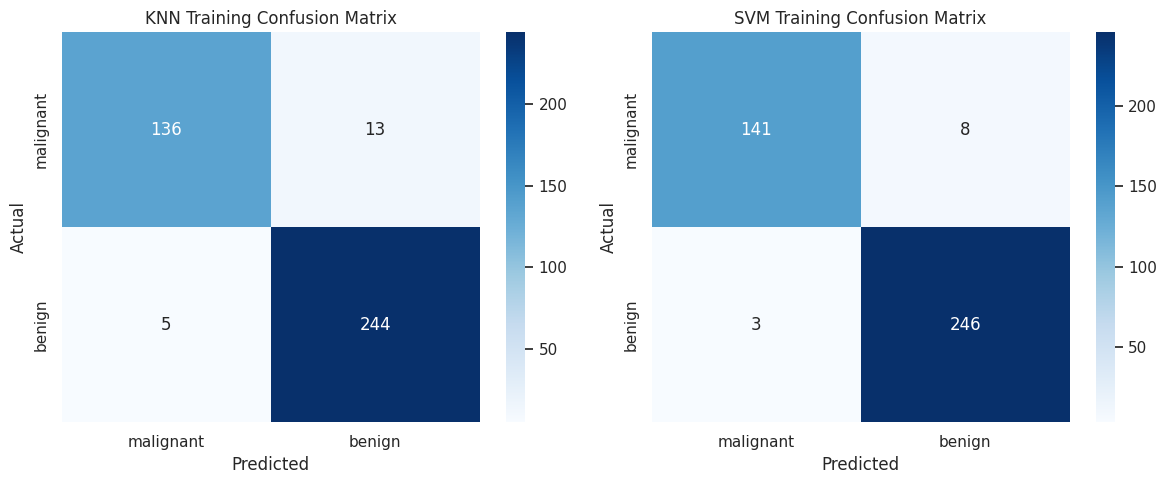

In [20]:
# Enter your code here
conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)
conf_matrix_svm = confusion_matrix(y_train, y_pred_train_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<details><summary>Click here for the solution</summary>
    
```python
# Plot the confusion matrices
conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)
conf_matrix_svm = confusion_matrix(y_train, y_pred_train_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
```
</details>


### Exercise 6. Comparing training and testing accuracies for both models
What can you say about the accuracy of the two models on the training and test data sets?

What do these results possibly indicate?


#### Please enter your descriptive answer here and change the cell type to "Markdown" for formatting.


<details><summary>Click here for the solution</summary>


Ideally the accuracy of a model would be almost the same on the training and testing data sets.

It would be unusual for the accuracy to be higher on the test set and this might occur due to chance or some sort of data leakage. For example, here we have normalized all of the data rather than fitting StandardScaler to the training data and only then applying it to the train and test sets separately. We'll revisit this and other pitfalls in another lab. 

When the accuracy is substantially higher on the training data than on the testing data, the model is likely memorizing details in the training data that don't generalize to the unseen data - the model is overfitting to the training data.


| Model | Phase |  Accuracy |
| ------------  | -------- | --------- |
| KNN  | Train  | 95.5% |
| KNN  | Test   | 93.6% |
| SVM  | Train  | 97.2% |
| SVM  | Test   | 97.1% |

For the SVM model, the training and testing accuracies are essentially the same at about 97%. This is ideal - the SVM model is likely not overfit.
For the KNN model, however, the training accuracy is about 2% higher that the test accuracy, indicating there might be some overfitting.

In summary, the SVM model is both more convincing and has a higher accuracy than the KNN model. 
Remember, we aren't trying to tune these models; we are just comparing their performance with a fixed set of hyperparamters.


</details>


## Summary
Congratulations! You're ready to move on to your next lesson! 
In this lab, you learned how to implement and assess the performance of classification models using real-world data. You explored different evaluation metrics and the confusion matrix to understand how well your models performed. By working with the breast cancer data set, you created two classification models to predict whether a mass is benign or malignant. Additionally, you simulated measurement errors by adding Gaussian random noise to the features and then evaluated the impact on your model's performance.


## Author

<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>


### Other Contributors

<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abhishek Gagneja</a>

<!-- ## Changelog

| Date | Version | Changed by | Change Description |
|:------------|:------|:------------------|:---------------------------------------|
| 2024-11-05 | 1.0  | Jeff Grossman    | Create content | -->



## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
